## In this notebook we will be using the breast cancer dataset from Scikit Learn library to perform PCA- Principle Component Analysis for classification and visualization

#### Step 1: Import essential libraries

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

#### Step 2: import data 

In [19]:
from sklearn.datasets import load_breast_cancer
Mydata=load_breast_cancer()


In [20]:
Mydata.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### Step 3: Let us create a dataframe with the data we have downloaded. 

In [32]:
df=pd.DataFrame(data=Mydata.data, columns=Mydata.feature_names)

In [33]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Step 4: Let us explore & understand our dataset a little in depth. 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##### Looks like our dataset is all numerical (float64) and also  there are no data missing.

### The first step is to normalize the data set. i.e. mean = 0 and stdev = 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)


#### Step 5: Let us plot 1 feature to make sure we see a mean distribution around 0. This confirms our StandardScaler has done what it's supposed to do.

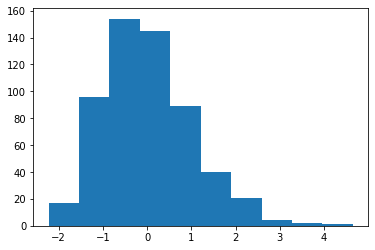

In [55]:
plt.hist(df_scaled[:,1])
plt.show()

#### Step 6: We import PCA from sklearn.decomposition and specify total number of components as 2

In [56]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_scaled)
x_pca=pca.transform(df_scaled)

In [59]:
type(x_pca)

numpy.ndarray

##### our pca components are in the form of an array. Let us convert into a DataFrame 

In [60]:
Mypca=pd.DataFrame(data=x_pca,columns=['PC1','PC2'])

In [64]:
Mypca.head(3)

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174


#### Let us see how much of our variance in our data has been lost by converting into principal components

In [65]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208])

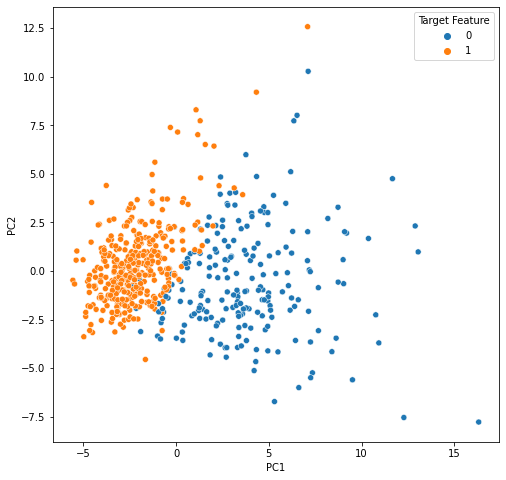

In [72]:
plt.figure(figsize = (8,8))
sns.scatterplot(data=Mypca,x='PC1',y='PC2',hue=Mydata.target)
plt.legend(title='Target Feature')

#### This clearly shows the separation between our target i.e. Malignant and Benign

### In this exercise we have successfully transformed 30 features into 2 principal components with the help of Principal Component Analysis (PCA)